<a href="https://colab.research.google.com/github/cipB14/Questify/blob/patch1/DifficultyLevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load data from CSV
file_path = "classified_questions.csv"  # Update with your actual file path
data = pd.read_csv(file_path)

# Assuming CSV columns: 'level1', 'level2', 'level3', 'level4', 'level5', 'level6', 'difficulty'
X = data[['BT1 (Remembering)', 'BT2 (Understanding)', 'BT3 (Applying)', 'BT4 (Analyzing)', 'BT5 (Evaluating)', 'BT6 (Creating)']].values
y = data['Difficulty_Score'].values

# Normalize inputs (already between 0 and 1, so optional)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(6,)),  # Hidden layer 1
    layers.Dense(8, activation='relu'),  # Hidden layer 2 (optional)
    layers.Dense(1, activation='sigmoid')  # Output layer
])


# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train the model
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")

# Save the model
model.save("my_model.keras")



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0341 - mae: 0.1279 - val_loss: 0.0248 - val_mae: 0.1038
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0196 - mae: 0.0908 - val_loss: 0.0223 - val_mae: 0.1029
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0185 - mae: 0.0995 - val_loss: 0.0223 - val_mae: 0.1078
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0219 - mae: 0.1135 - val_loss: 0.0218 - val_mae: 0.1055
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0250 - mae: 0.1153 - val_loss: 0.0217 - val_mae: 0.1007
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0215 - mae: 0.1058 - val_loss: 0.0209 - val_mae: 0.0980
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0203 - mae: 0.1000 - val_loss: 0.0206 - val_mae: 0.0983
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0212 - mae: 0.1062 - val_loss: 0.0207 - val_mae: 0.0990
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0194 - mae: 0

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
file_path = "classified_questions.csv"  # Update with your actual file path
data = pd.read_csv(file_path)


# Extract features and target
X = data[['BT1 (Remembering)', 'BT2 (Understanding)', 'BT3 (Applying)', 'BT4 (Analyzing)', 'BT5 (Evaluating)', 'BT6 (Creating)']].values
y = data['Difficulty_Score'].values


# Normalize inputs
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Normalize difficulty level (assuming max difficulty is the highest value in the dataset)
y = y / max(y)

# Convert to PyTorch tensors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train, dtype=torch.float32).view(-1, 1), torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define Neural Network
class DifficultyPredictor(nn.Module):
    def __init__(self):
        super(DifficultyPredictor, self).__init__()
        self.fc1 = nn.Linear(6, 10)  # 6 input features, 10 neurons in hidden layer
        self.fc2 = nn.Linear(10, 1)  # Output layer
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  # Output between 0 and 1

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Initialize model, loss function, and optimizer
model = DifficultyPredictor()
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Compute validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)

    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Convert continuous predictions to categorical labels
def categorize_difficulty(y_pred):
    return np.where(y_pred < 0.45, 0, np.where(y_pred < 0.7, 1, 2))  # Adjust threshold


# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test).numpy().flatten()
    y_pred_labels = categorize_difficulty(y_pred)
    y_true_labels = categorize_difficulty(y_test.numpy().flatten())

# Compute Metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Final Validation Loss: {val_loss.item():.4f}")


Epoch [0/200], Loss: 0.0424, Val Loss: 0.0364
Epoch [10/200], Loss: 0.0330, Val Loss: 0.0317
Epoch [20/200], Loss: 0.0306, Val Loss: 0.0296
Epoch [30/200], Loss: 0.0297, Val Loss: 0.0281
Epoch [40/200], Loss: 0.0292, Val Loss: 0.0278
Epoch [50/200], Loss: 0.0289, Val Loss: 0.0268
Epoch [60/200], Loss: 0.0286, Val Loss: 0.0267
Epoch [70/200], Loss: 0.0282, Val Loss: 0.0263
Epoch [80/200], Loss: 0.0279, Val Loss: 0.0263
Epoch [90/200], Loss: 0.0276, Val Loss: 0.0263
Epoch [100/200], Loss: 0.0271, Val Loss: 0.0261
Epoch [110/200], Loss: 0.0267, Val Loss: 0.0259
Epoch [120/200], Loss: 0.0262, Val Loss: 0.0258
Epoch [130/200], Loss: 0.0256, Val Loss: 0.0255
Epoch [140/200], Loss: 0.0251, Val Loss: 0.0252
Epoch [150/200], Loss: 0.0246, Val Loss: 0.0250
Epoch [160/200], Loss: 0.0242, Val Loss: 0.0249
Epoch [170/200], Loss: 0.0238, Val Loss: 0.0249
Epoch [180/200], Loss: 0.0234, Val Loss: 0.0250
Epoch [190/200], Loss: 0.0231, Val Loss: 0.0251

Model Performance Metrics:
Accuracy: 0.6538
Precis

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np

unique_preds, counts_preds = np.unique(y_pred_labels, return_counts=True)
print("Predicted Labels Distribution:", dict(zip(unique_preds, counts_preds)))

unique_true, counts_true = np.unique(y_true_labels, return_counts=True)
print("True Labels Distribution:", dict(zip(unique_true, counts_true)))


Predicted Labels Distribution: {1: 21, 2: 5}
True Labels Distribution: {0: 6, 1: 17, 2: 3}


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
file_path = "classified_questions.csv"  # Update with actual file path
data = pd.read_csv(file_path)

# Extract features and target
X = data[['BT1 (Remembering)', 'BT2 (Understanding)', 'BT3 (Applying)', 'BT4 (Analyzing)', 'BT5 (Evaluating)', 'BT6 (Creating)']].values
y = data['Difficulty_Score'].values

# Normalize input features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Convert difficulty levels to categorical labels (0 = Easy, 1 = Medium, 2 = Hard)
def categorize_difficulty(y):
    return np.where(y < 0.4, 0, np.where(y < 0.7, 1, 2))

y = categorize_difficulty(y)

# Convert to PyTorch tensors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train, dtype=torch.long), torch.tensor(y_test, dtype=torch.long)  # Use long for classification

# Define Neural Network
class DifficultyPredictor(nn.Module):
    def __init__(self):
        super(DifficultyPredictor, self).__init__()
        self.fc1 = nn.Linear(6, 10)  # 6 input features, 10 neurons in hidden layer
        self.fc2 = nn.Linear(10, 3)  # 3 output classes (Easy, Medium, Hard)
        self.leaky_relu = nn.LeakyReLU(0.01)
        self.softmax = nn.Softmax(dim=1)  # Softmax for classification

    def forward(self, x):
        x = self.leaky_relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

# Initialize model, loss function, and optimizer
model = DifficultyPredictor()
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Reduced learning rate

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)  # Compute loss
    loss.backward()
    optimizer.step()

    # Compute validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)

    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test).numpy()
    y_pred_labels = np.argmax(y_pred_probs, axis=1)  # Get the class with highest probability
    y_true_labels = y_test.numpy()

# Compute Metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=1)
recall = recall_score(y_true_labels, y_pred_labels, average='weighted', zero_division=1)
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Final Validation Loss: {val_loss.item():.4f}")

# Show class distribution in predictions and ground truth
unique_preds, counts_preds = np.unique(y_pred_labels, return_counts=True)
print("Predicted Labels Distribution:", dict(zip(unique_preds, counts_preds)))

unique_true, counts_true = np.unique(y_true_labels, return_counts=True)
print("True Labels Distribution:", dict(zip(unique_true, counts_true)))


Epoch [0/100], Loss: 1.0658, Val Loss: 1.0657
Epoch [10/100], Loss: 1.0584, Val Loss: 1.0580
Epoch [20/100], Loss: 1.0508, Val Loss: 1.0502
Epoch [30/100], Loss: 1.0430, Val Loss: 1.0421
Epoch [40/100], Loss: 1.0347, Val Loss: 1.0336
Epoch [50/100], Loss: 1.0260, Val Loss: 1.0245
Epoch [60/100], Loss: 1.0168, Val Loss: 1.0149
Epoch [70/100], Loss: 1.0071, Val Loss: 1.0047
Epoch [80/100], Loss: 0.9968, Val Loss: 0.9942
Epoch [90/100], Loss: 0.9864, Val Loss: 0.9837

Model Performance Metrics:
Accuracy: 0.6538
Precision: 0.7737
Recall: 0.6538
F1-Score: 0.5170
Final Validation Loss: 0.9744
Predicted Labels Distribution: {1: 26}
True Labels Distribution: {0: 6, 1: 17, 2: 3}


In [9]:
import pandas as pd
import numpy as np

# Load dataset
file_path = "classified_questions.csv"
data = pd.read_csv(file_path)

# Extract difficulty scores
y = data['Difficulty_Score'].values

# Convert difficulty scores to categorical labels (Easy, Medium, Hard)
def categorize_difficulty(y):
    return np.where(y < 0.4, 0, np.where(y < 0.7, 1, 2))  # 0: Easy, 1: Medium, 2: Hard

y_labels = categorize_difficulty(y)

# Count occurrences of each class
unique, counts = np.unique(y_labels, return_counts=True)
difficulty_distribution = dict(zip(["Easy (0)", "Medium (1)", "Hard (2)"], counts))

print("Difficulty Level Distribution:", difficulty_distribution)


Difficulty Level Distribution: {'Easy (0)': 28, 'Medium (1)': 83, 'Hard (2)': 16}


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
file_path = "classified_questions.csv"  # Update with actual file path
data = pd.read_csv(file_path)

# Extract features and target
X = data[['BT1 (Remembering)', 'BT2 (Understanding)', 'BT3 (Applying)', 'BT4 (Analyzing)', 'BT5 (Evaluating)', 'BT6 (Creating)']].values
y = data['Difficulty_Score'].values

# Normalize input features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Convert difficulty levels to categorical labels (0 = Easy, 1 = Medium, 2 = Hard)
def categorize_difficulty(y):
    return np.where(y < 0.4, 0, np.where(y < 0.7, 1, 2))

y = categorize_difficulty(y)

# Convert to PyTorch tensors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train, dtype=torch.long), torch.tensor(y_test, dtype=torch.long)  # Use long for classification

# Define Neural Network
class DifficultyPredictor(nn.Module):
    def __init__(self):
        super(DifficultyPredictor, self).__init__()
        self.fc1 = nn.Linear(6, 16)  # More neurons for better learning
        self.fc2 = nn.Linear(16, 8)  # Extra hidden layer
        self.fc3 = nn.Linear(8, 3)   # Output layer (3 classes)
        self.leaky_relu = nn.LeakyReLU(0.01)  # LeakyReLU for better gradient flow

    def forward(self, x):
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.fc3(x)  # NO Softmax (CrossEntropyLoss will handle it)
        return x

# Initialize model, loss function, and optimizer
model = DifficultyPredictor()

# Compute class weights (inverse frequency method)
class_counts = np.bincount(y_train.numpy())  # Count occurrences of each class
class_weights = 1.0 / class_counts  # Inverse frequency
class_weights = class_weights / class_weights.sum()  # Normalize

# Convert to tensor
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

# Apply weighted loss to balance classes
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)  # Compute loss
    loss.backward()
    optimizer.step()

    # Compute validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)

    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test).numpy()
    y_pred_labels = np.argmax(y_pred_probs, axis=1)  # Get the class with highest probability
    y_true_labels = y_test.numpy()

# Compute Metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=1)
recall = recall_score(y_true_labels, y_pred_labels, average='weighted', zero_division=1)
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Final Validation Loss: {val_loss.item():.4f}")

# Show class distribution in predictions and ground truth
unique_preds, counts_preds = np.unique(y_pred_labels, return_counts=True)
print("Predicted Labels Distribution:", dict(zip(unique_preds, counts_preds)))

unique_true, counts_true = np.unique(y_true_labels, return_counts=True)
print("True Labels Distribution:", dict(zip(unique_true, counts_true)))

# Print Difficulty Level Distribution
difficulty_counts = {
    "Easy (0)": np.sum(y_train.numpy() == 0),
    "Medium (1)": np.sum(y_train.numpy() == 1),
    "Hard (2)": np.sum(y_train.numpy() == 2),
}
print("\nDifficulty Level Distribution:", difficulty_counts)


Epoch [0/100], Loss: 1.1067, Val Loss: 1.1016
Epoch [10/100], Loss: 1.1022, Val Loss: 1.0990
Epoch [20/100], Loss: 1.0979, Val Loss: 1.0963
Epoch [30/100], Loss: 1.0934, Val Loss: 1.0933
Epoch [40/100], Loss: 1.0881, Val Loss: 1.0897
Epoch [50/100], Loss: 1.0815, Val Loss: 1.0848
Epoch [60/100], Loss: 1.0734, Val Loss: 1.0789
Epoch [70/100], Loss: 1.0637, Val Loss: 1.0721
Epoch [80/100], Loss: 1.0528, Val Loss: 1.0652
Epoch [90/100], Loss: 1.0401, Val Loss: 1.0568

Model Performance Metrics:
Accuracy: 0.2692
Precision: 0.7720
Recall: 0.2692
F1-Score: 0.2121
Final Validation Loss: 1.0486
Predicted Labels Distribution: {0: 7, 1: 1, 2: 18}
True Labels Distribution: {0: 6, 1: 17, 2: 3}

Difficulty Level Distribution: {'Easy (0)': 22, 'Medium (1)': 66, 'Hard (2)': 13}


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def classify_difficulty(score):
    if score <= 0.4:
        return 'Easy'
    elif 0.4 < score <= 0.7:
        return 'Medium'
    else:
        return 'Hard'

# Load dataset
file_path = "classified_questions (1).csv"  # Update with actual file path
data = pd.read_csv(file_path)

# Extract features and target
X = data[['BT1 (Remembering)', 'BT2 (Understanding)', 'BT3 (Applying)', 'BT4 (Analyzing)', 'BT5 (Evaluating)', 'BT6 (Creating)']].values
y = data['Difficulty_Score'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

# Predict difficulty scores
y_pred = model.predict(X_test)

# Convert predicted scores to categories
difficulty_labels = [classify_difficulty(score) for score in y_pred]

df_results = pd.DataFrame({
     "Actual Difficulty": y_test,
    "Predicted Difficulty Score": y_pred,
    "Predicted Difficulty Level": difficulty_labels
})

print(df_results)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display feature weights
print("Feature Weights:", model.coef_)


    Actual Difficulty  Predicted Difficulty Score Predicted Difficulty Level
0            0.550000                    0.565112                     Medium
1            0.550000                    0.556965                     Medium
2            0.550000                    0.494326                     Medium
3            0.255535                    0.470748                     Medium
4            0.276063                    0.519771                     Medium
5            0.300000                    0.468373                     Medium
6            0.550000                    0.498636                     Medium
7            0.145297                    0.494001                     Medium
8            0.105389                    0.517756                     Medium
9            0.300000                    0.524898                     Medium
10           0.300000                    0.647901                     Medium
11           0.808744                    0.588214                     Medium

Mean Squared Error: 0.048685495414432685


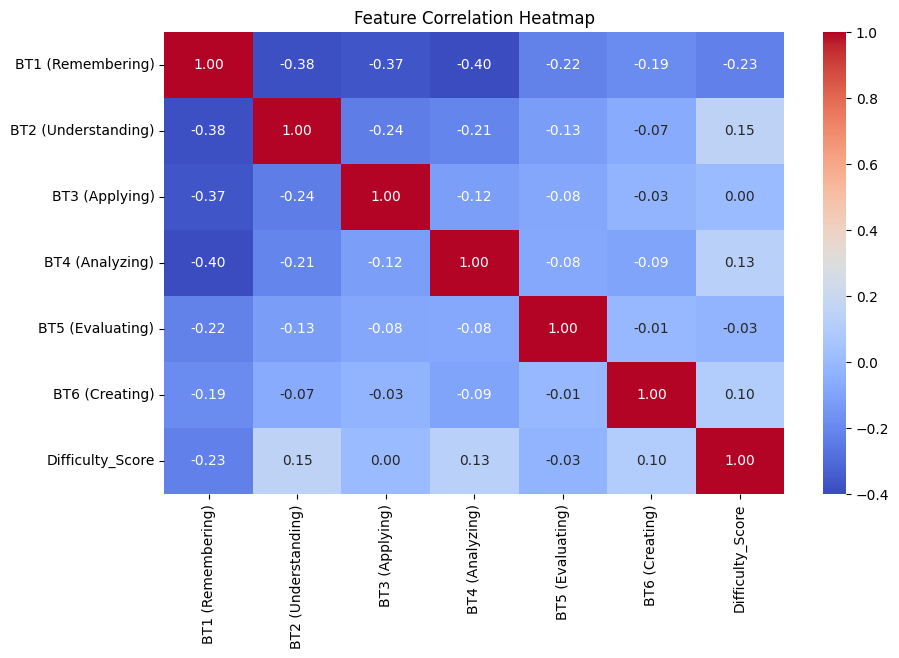

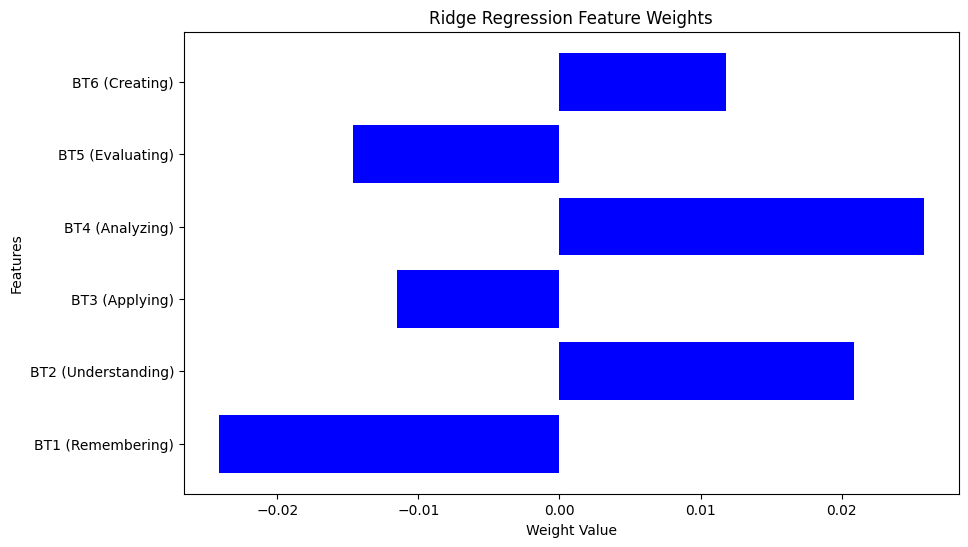

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

# Load dataset
file_path = "classified_questions (1).csv"
df = pd.read_csv(file_path)

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target (excluding 'Bloom's Taxonomy Level' and 'Question')
columns_to_exclude = ["Bloom's Taxonomy Level", "Question"]
X = df.drop(columns=["Difficulty_Score"] + columns_to_exclude)
y = df["Difficulty_Score"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predictions
y_pred = ridge.predict(X_test_scaled)

# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature Importance (Weights)
feature_weights = ridge.coef_
feature_names = X.columns

# Plot Heatmap for Feature Correlation (excluding 'Bloom's Taxonomy Level' and 'Question')
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=columns_to_exclude).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Plot Feature Weights
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_weights, color="blue")
plt.xlabel("Weight Value")
plt.ylabel("Features")
plt.title("Ridge Regression Feature Weights")
plt.show()


Mean Squared Error: 0.048685495414432685
Feature Weights:
BT1 (Remembering): -0.0241
BT2 (Understanding): 0.0209
BT3 (Applying): -0.0115
BT4 (Analyzing): 0.0258
BT5 (Evaluating): -0.0146
BT6 (Creating): 0.0118


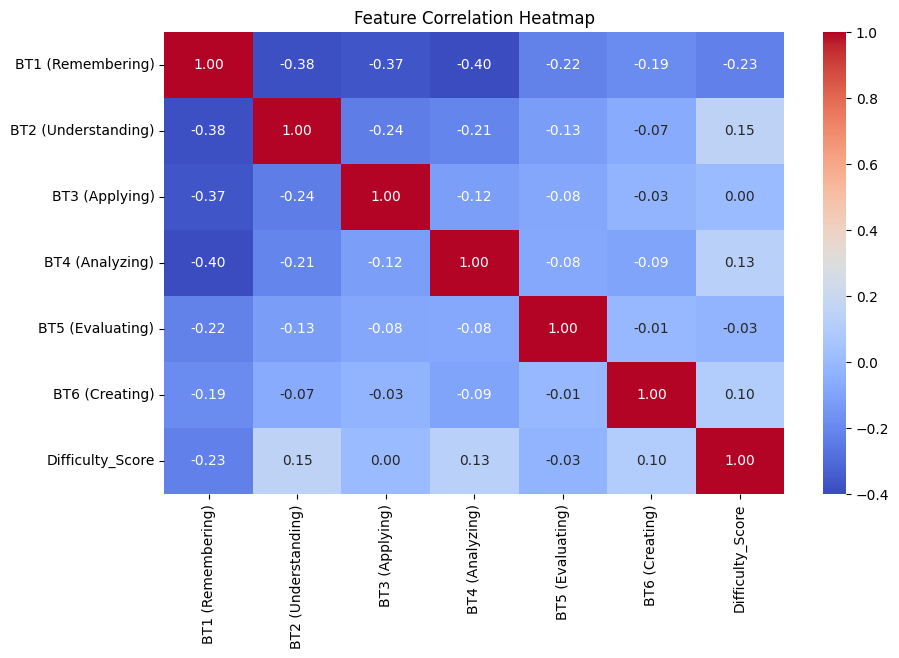

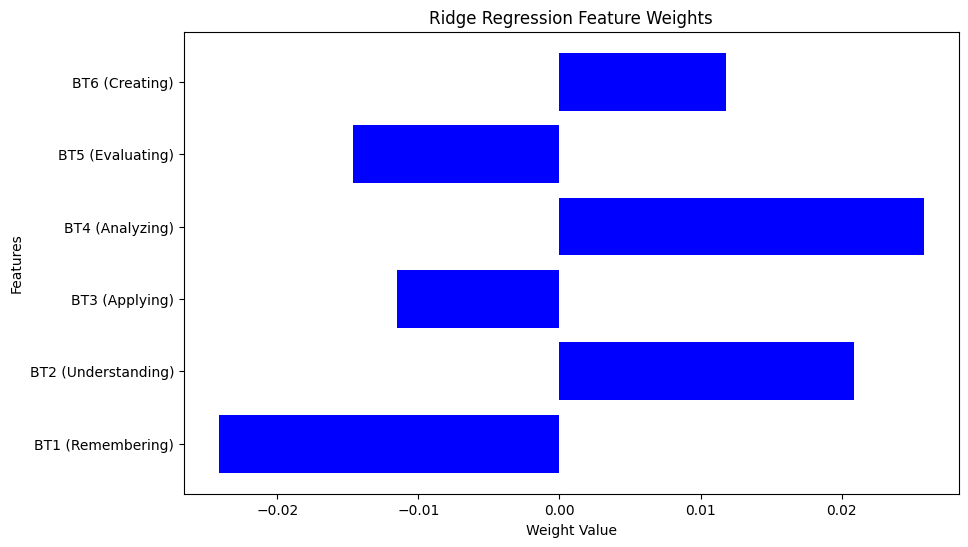

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

# Load dataset
file_path = "classified_questions (1).csv"
df = pd.read_csv(file_path)

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target (excluding 'Bloom's Taxonomy Level' and 'Question')
columns_to_exclude = ["Bloom's Taxonomy Level", "Question"]
X = df.drop(columns=["Difficulty_Score"] + columns_to_exclude)
y = df["Difficulty_Score"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predictions
y_pred = ridge.predict(X_test_scaled)

# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature Importance (Weights)
feature_weights = ridge.coef_
feature_names = X.columns

# Print Feature Weights
print("Feature Weights:")
for feature, weight in zip(feature_names, feature_weights):
    print(f"{feature}: {weight:.4f}")

# Plot Heatmap for Feature Correlation (excluding 'Bloom's Taxonomy Level' and 'Question')
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=columns_to_exclude).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Plot Feature Weights
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_weights, color="blue")
plt.xlabel("Weight Value")
plt.ylabel("Features")
plt.title("Ridge Regression Feature Weights")
plt.show()


In [10]:
!pip install transformers

import torch
from google.colab import files
from transformers import  BertTokenizer, BertForSequenceClassification

# 🔹 Load Bloom’s Taxonomy BERT Model
blooms_model_name = "cip29/blooms_bert"  # Update with your model name if different
blooms_tokenizer = BertTokenizer.from_pretrained(blooms_model_name)
blooms_model = BertForSequenceClassification.from_pretrained(blooms_model_name, num_labels=6).to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [11]:
import csv
from google.colab import files
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# 🔹 Function to Classify Questions into Bloom’s Taxonomy Levels
def classify_blooms_taxonomy(question):
    model_name = "cip29/blooms_bert"  # Change to your fine-tuned model
    blooms_tokenizer = BertTokenizer.from_pretrained(model_name)
    blooms_model = BertForSequenceClassification.from_pretrained(model_name, num_labels=6, device_map="cuda")

    inputs = blooms_tokenizer(question, return_tensors="pt", padding=True, truncation=True).to("cuda")
    with torch.no_grad():
        outputs = blooms_model(**inputs)

    probs = torch.nn.functional.softmax(outputs.logits, dim=1).cpu().numpy().flatten()
    bloom_levels = ["BT1 (Remembering)", "BT2 (Understanding)", "BT3 (Applying)",
                    "BT4 (Analyzing)", "BT5 (Evaluating)", "BT6 (Creating)"]

    max_index = probs.argmax()
    predicted_level = bloom_levels[max_index]

    probabilities_dict = {bloom_levels[i]: probs[i] for i in range(len(bloom_levels))}

    return predicted_level, probabilities_dict

# 🔹 Function to Upload & Process CSV
def upload_and_classify_questions():
    uploaded = files.upload()  # Prompt user to upload file
    input_csv = list(uploaded.keys())[0]  # Get the uploaded filename

    output_csv = "classified_questions.csv"

    with open(input_csv, mode='r', encoding='utf-8') as infile, open(output_csv, mode='w', newline='', encoding='utf-8') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        # Write header row
        writer.writerow(["Question", "Bloom's Taxonomy Level",
                         "BT1 (Remembering)", "BT2 (Understanding)", "BT3 (Applying)",
                         "BT4 (Analyzing)", "BT5 (Evaluating)", "BT6 (Creating)", "Difficulty_Score"])

        next(reader)  # Skip header

        for row in reader:
            question = row[0]  # Extract question
            difficulty_score = row[2] if len(row) > 2 else "N/A"  # Handle missing difficulty score

            bloom_level, probs = classify_blooms_taxonomy(question)

            # Write data to output CSV
            writer.writerow([question, bloom_level,
                             probs["BT1 (Remembering)"], probs["BT2 (Understanding)"],
                             probs["BT3 (Applying)"], probs["BT4 (Analyzing)"],
                             probs["BT5 (Evaluating)"], probs["BT6 (Creating)"], difficulty_score])

    # 📥 Download the classified CSV file
    files.download(output_csv)
    print(f"✅ Classification complete! File saved as {output_csv}")

# 🔹 Run the Function to Upload & Process Questions
upload_and_classify_questions()


Saving dl_questions_final_balanced.csv to dl_questions_final_balanced (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Classification complete! File saved as classified_questions.csv
